<a href="https://colab.research.google.com/github/Konica24/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [7]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## Divide the dataset into indeoendent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [15]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [18]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [21]:
X=pd.concat([X,geography, gender],axis=1)

In [22]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [25]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [26]:
X_train.shape

(8000, 11)

In [27]:
## Part 2. Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [28]:
## Lets initialize the ANN
classifier=Sequential()

In [29]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [30]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [48]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [50]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [51]:
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [53]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [54]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6627 - loss: 0.6023 - val_accuracy: 0.7955 - val_loss: 0.4830
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7959 - loss: 0.4764 - val_accuracy: 0.7955 - val_loss: 0.4596
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8009 - loss: 0.4604 - val_accuracy: 0.7955 - val_loss: 0.4615
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7935 - loss: 0.4526 - val_accuracy: 0.7955 - val_loss: 0.4515
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7949 - loss: 0.4504 - val_accuracy: 0.7955 - val_loss: 0.4508
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7881 - loss: 0.4530 - val_accuracy: 0.7955 - val_loss: 0.4497
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7977 - loss: 0.4590 - val_accuracy: 0.7955 - val_loss: 0.4517
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8035 - loss: 0.4626 - 

In [55]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

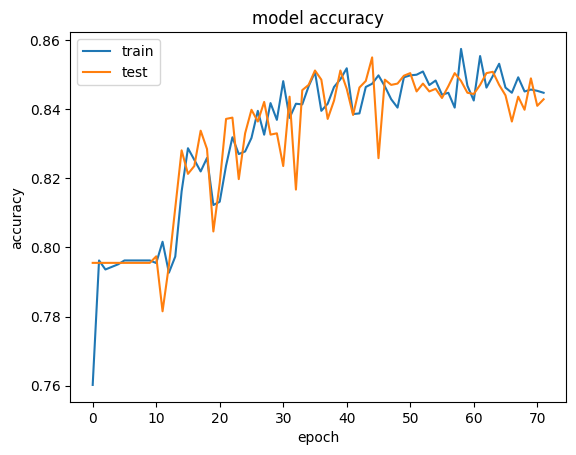

In [56]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

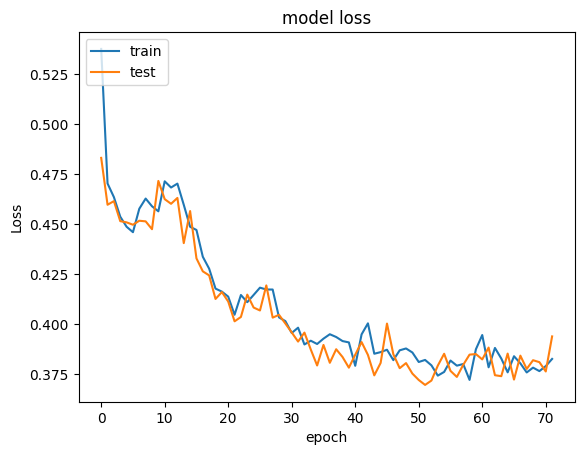

In [57]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [58]:
## Part 3- Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred= (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [61]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1565,   30],
       [ 263,  142]])

In [62]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)


In [63]:
score

0.8535

In [64]:
# get the weights
classifier.get_weights()

[array([[-0.7616066 ,  0.6407203 ,  0.79476416, -1.0352831 ,  0.3021446 ,
          0.2659938 , -0.20005924,  0.916607  , -0.05649583, -0.33679473,
          1.6562195 ],
        [-2.6176083 ,  1.9817594 , -5.1110554 ,  1.8953029 ,  1.1551927 ,
          1.5568686 , -5.078679  , -4.533059  ,  0.36334392, -1.0080879 ,
         -0.01311269],
        [ 1.6198753 , -1.0169858 ,  0.6459323 , -0.16307305,  0.11634266,
         -0.61325544,  0.81695515,  0.5903923 , -1.1092222 ,  0.34572667,
          1.4362433 ],
        [-0.485219  ,  0.49872383,  1.3561585 , -0.23110627, -1.319204  ,
          3.35449   ,  2.148955  , -1.0627619 ,  0.7726344 ,  0.8134923 ,
          3.8126273 ],
        [ 0.17596355, -0.39814472,  0.2985481 ,  0.18846735, -5.9168386 ,
          2.4891632 , -1.9000093 ,  0.35838634, -2.0937653 ,  4.6127224 ,
          1.7407151 ],
        [-0.23979594,  1.0449555 ,  0.947808  ,  0.18409795, -0.1939832 ,
         -0.2449451 ,  1.3974409 , -1.4462026 ,  0.46149933,  0.5480859